# Handwritten Digit Recogniton.
## Web App Development using flask with Feed Forward Neural Networks

In [1]:
from keras.datasets import mnist

In [2]:
(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [3]:
print('train_data.shape',train_data.shape)
print('test_data.shape',test_data.shape)
print('train_target.shape',train_target.shape)
print('test_target.shape',test_target.shape)

train_data.shape (60000, 28, 28)
test_data.shape (10000, 28, 28)
train_target.shape (60000,)
test_target.shape (10000,)


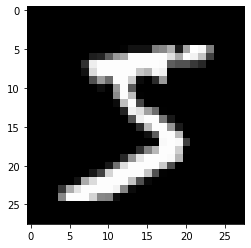

In [4]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')

In [5]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(train_target[0])

5


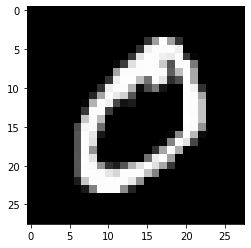

In [7]:
plt.imshow(train_data[1],cmap='gray')

In [8]:
print(train_target[1])

0


In [9]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

model=Sequential()
model.add(Flatten(input_shape=(28,28)))  #Flatten layer to flatten the 2D image
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))  #Output layer

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.utils import np_utils

train_target=np_utils.to_categorical(train_target)
test_target=np_utils.to_categorical(test_target)

In [11]:
print(train_target[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0301 - accuracy: 0.8746 - val_loss: 0.2486 - val_accuracy: 0.9308
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2128 - accuracy: 0.9405 - val_loss: 0.1913 - val_accuracy: 0.9482
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1611 - accuracy: 0.9547 - val_loss: 0.1926 - val_accuracy: 0.9517
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9605 - val_loss: 0.1727 - val_accuracy: 0.9538
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9673 - val_loss: 0.1483 - val_accuracy: 0.9635
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9711 - val_loss: 0.1369 - val_accuracy: 0.9658
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9744 - val_loss: 0.1260 - val_accuracy:

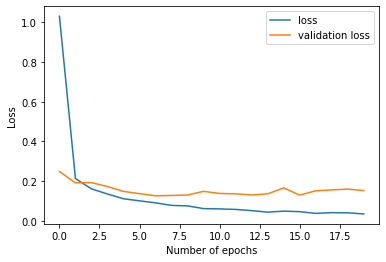

In [13]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

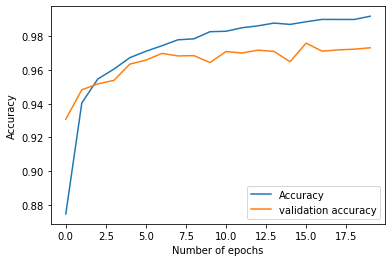

In [14]:
plt.plot(model.history.history['accuracy'],label='Accuracy')
plt.plot(model.history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [15]:
print(model.evaluate(test_data,test_target))

313/313 [==============================] - 1s 4ms/step - loss: 0.1390 - accuracy: 0.9747
[0.1390385925769806, 0.9746999740600586]


In [16]:
model.save_weights('HandwrittenDigitRecognition.h5')